# Design perceptron learning rule for 3-input AND, OR, NAND & NOR.


In [1]:
#loading required package
import numpy as np
import matplotlib.pyplot as plt

### Training Dataset(Truth table for AND,OR,NAND,NOR).

In [2]:
#INPUT
x_train=[[0,0,0],
         [0,0,1],
         [0,1,0],
         [0,1,1],
         [1,0,0],
         [1,0,1],
         [1,1,0],
         [1,1,1]]

#OUTPUT
y_train_and  = np.array([0,0,0,0,0,0,0,1])  #AND
y_train_or   = np.array([0,1,1,1,1,1,1,1])  #OR
y_train_nand = np.array([1,1,1,1,1,1,1,0])  #NAND
y_train_nor  = np.array([1,0,0,0,0,0,0,0])  #NAND
x_train = np.array(x_train)
print(x_train.shape,y_train_and.shape)

(8, 3) (8,)


### Generating Testing Dataset (Point nearer to training dataset).
Steps:
1. generate values near 0,1 
2. create 3 input points from step 1 by using loop(3 times).
3. append to x_test point generated in step2.
4. create corresponding y_test for and,or,nand,nor.

In [3]:
a=np.linspace(-0.1,0.1,5)        #points nearer to zero -0.1 to 0.1
b=np.linspace(0.9,1.1,5)        #points nearer to one  0.9 to 1.1
c = np.hstack((a,b)) 
x_test = []
y_test_and = []
y_test_or = []
y_test_nor = []
y_test_nand = []

for i in c:                   #creating combination of points with three input
    for j in c:
        for k in c:
            x_test.append([i,j,k])
            tmp = np.round(x_test[-1])
            and_x = tmp[0] and tmp[1] and tmp[2]
            or_x = tmp[0] and tmp[1] and tmp[2]
            y_test_and.append(and_x)
            y_test_or.append(or_x)
            
            if and_x==0:
                y_test_nand.append(1)
            else:
                y_test_nand.append(0)
            
            if or_x==0:
                y_test_nor.append(1)
                y_test_nor.append(0)
                
            
x_test = np.array(x_test)
y_test_and = np.array(y_test_and)
y_test_or = np.array(y_test_or)
y_test_nand = np.array(y_test_nand)
y_test_nor = np.array(y_test_nor)
print(x_test.shape,y_test_and.shape)
print("Display top 10 testing inputs ",x_test[:10,:])   

(1000, 3) (1000,)
Display top 10 testing inputs  [[-0.1  -0.1  -0.1 ]
 [-0.1  -0.1  -0.05]
 [-0.1  -0.1   0.  ]
 [-0.1  -0.1   0.05]
 [-0.1  -0.1   0.1 ]
 [-0.1  -0.1   0.9 ]
 [-0.1  -0.1   0.95]
 [-0.1  -0.1   1.  ]
 [-0.1  -0.1   1.05]
 [-0.1  -0.1   1.1 ]]


## Perceptron unit :
\begin{equation}
    \sum_{i=1}^{n} w_ix_i >= \theta , y=1\ else\ y=0
\end{equation}

In [4]:
#using above equation to create single unit of perceptron.
def perceptron(x,w,threshold):
    sum = 0 
    for xi,wi in zip(x,w):         #x1w1+x2w2+x3w3+.....+xnwn
        sum += xi*wi
    if sum>= threshold:                #  wx - theta >=0 
        return 1
    else:
        return 0
    
   

## Delta Learning Algorithm :
\begin{equation}
                error(p) = y_{train(p)} - y_{predicted(p)} \\
                w_i(p+1) = w_i + \alpha * x * error(p)
\end{equation}

In [5]:
#Delta Learning Algorithm using above two equations
def deltaLearningAlgorithm(x_train,y_train,alpha=1e-2,max_epoch=100):
    w = np.zeros(x_train.shape[1])
    theta = np.random.random()
    #theat = 0
    print("Initial Weight --> ",w)
    print("Initial Thresold -->",theta)
    
    for c in range(max_epoch):
        for i in range(x_train.shape[0]):
            y_predicted = perceptron(x_train[i],w,threshold=theta)
            error = y_train[i] - y_predicted
            if y_train[i]==y_predicted:
                error= 0
            elif y_train[i] < y_predicted:
                error= -1
            else:
                error= +1
    
        
            dw = alpha*x_train[i]*error
            dtheta = alpha*1*error
            w = w +dw                        #updating weight
            theta = theta - dtheta           #updating thresold i.e, theta
            
            
            
    return w,theta

### Defining function to find Accuracy :

In [6]:
def accuracy(x_test,y_test,w,thresold):
    count =0
    m,n = x_test.shape
    for i in range(m):
        predict = perceptron(x_test[i],w,thresold)
        if predict==y_test[i]:
            count +=1
    
    return (count*100)/m

### plot3d to visualize in 3d (blue=1 , red = 0 ) 1,0 are output 

In [7]:
def plot3d(w_final,theta_final):
    p = np.linspace(-2,2,20)
    px,py,pz=[],[],[]
    nx,ny,nz=[],[],[]
    for i in p:
        for j in p:
            for k in p:
                if perceptron(np.array([i,j,k]),w_final,theta_final)>=1:
                    px.append(i)
                    py.append(j)
                    pz.append(k)
                else:
                    nx.append(i)
                    ny.append(j)
                    nz.append(k)



    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(px,py,pz,color='blue')
    ax.scatter3D(nx,ny,nz,color='red')
    ax.set_title('Plot (blue=1 as output),(red=0 as output)')
    plt.show()

## AND (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.6371268442032404
Final Weight   -> [0.16 0.16 0.16]
Final Thresold -> 0.47712684420324025
For training data(prediction) --->  0,0,0,0,0,0,0,1,

Accuracy  ------> 94.7


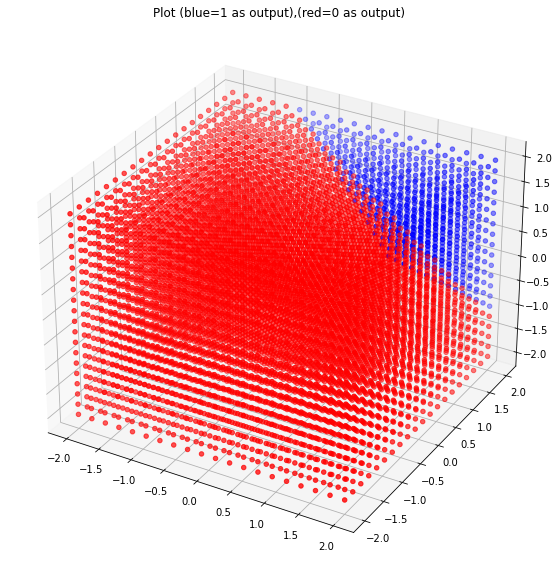

In [8]:
#Applying delta learning algorithm for and.
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_and,alpha=1e-2,max_epoch=300)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_and,w_final,theta_final))
plot3d(w_final,theta_final)

### OR (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.851984197676338
Final Weight   -> [0.28 0.28 0.28]
Final Thresold -> 0.2719841976763375
For training data(prediction) --->  0,1,1,1,1,1,1,1,

Accuracy  ------> 40.9


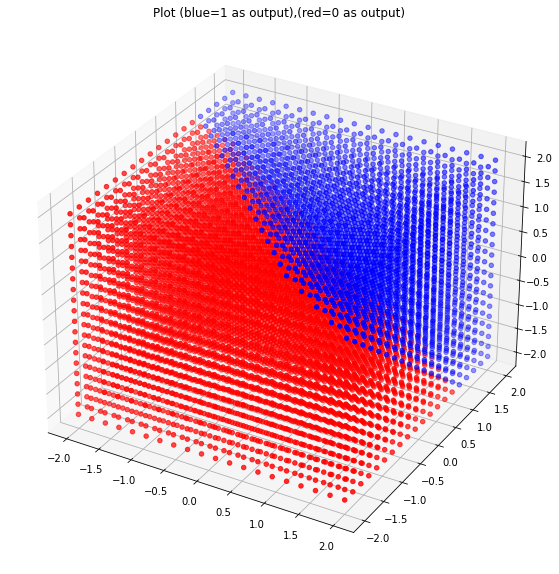

In [9]:
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_or,alpha=1e-2,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_or,w_final,theta_final))
plot3d(w_final,theta_final)

### NAND (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.552678039948112
Final Weight   -> [-0.02 -0.01 -0.01]
Final Thresold -> -0.03732196005188831
For training data(prediction) --->  1,1,1,1,1,1,1,0,

Accuracy  ------> 99.3


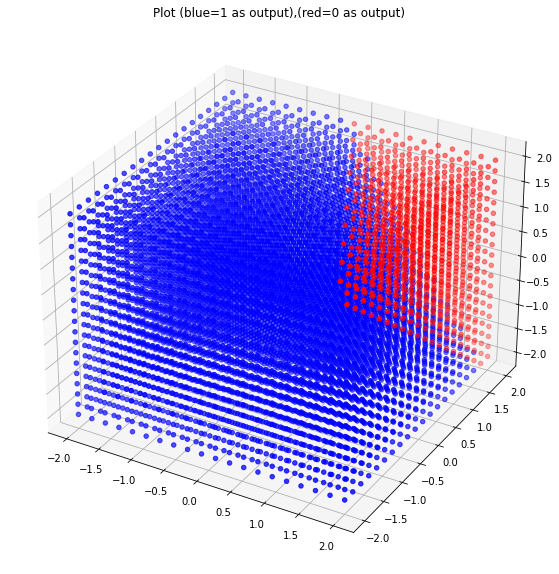

In [10]:
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_nand,alpha=1e-2,max_epoch=100)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_nand,w_final,theta_final))
plot3d(w_final,theta_final)

### NOR (3-INPUT)

Initial Weight -->  [0. 0. 0.]
Initial Thresold --> 0.290110471160705
Final Weight   -> [-0.01 -0.01 -0.01]
Final Thresold -> -0.009889528839295137
For training data(prediction) --->  1,0,0,0,0,0,0,0,

Accuracy  ------> 53.6


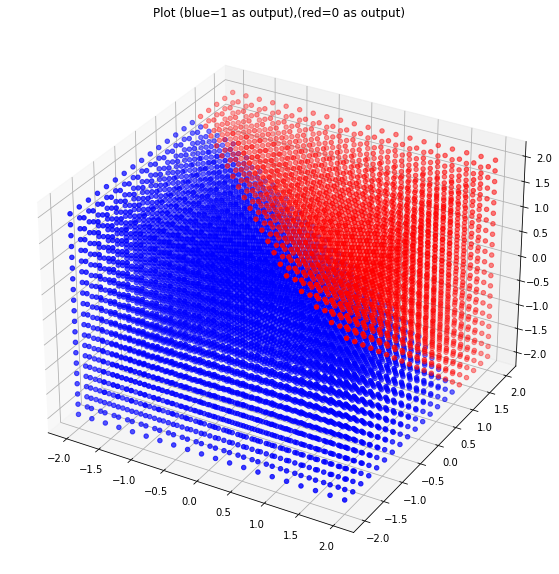

In [11]:
w_final,theta_final = deltaLearningAlgorithm(x_train,y_train_nor,alpha=1e-2,max_epoch=300)
print("Final Weight   ->",w_final)
print("Final Thresold ->",theta_final)
print("For training data(prediction) --->",end="  ")
for i in range(8):
    print(perceptron(x_train[i],w_final,threshold=theta_final),end=",")


print("\n\nAccuracy  ------>",accuracy(x_test,y_test_nor,w_final,theta_final))
plot3d(w_final,theta_final)

### Visualization by plotting for 2-input AND (For simplification)

Initial Weight -->  [0. 0.]
Initial Thresold --> 0.0842802975212078
0
0
0
1


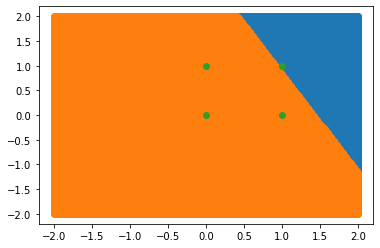

In [12]:
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y_and = np.array([0,0,0,1])
y_or = np.array([0,1,1,1])
y_nand = np.array([1,1,1,0])
y_nor = np.array([1,0,0,0])
w_final,theta_final = deltaLearningAlgorithm(x,y_and,alpha=1e-1,max_epoch=100)
for i in range(4):
    print(perceptron(x[i],w_final,threshold=theta_final))
p = np.linspace(-2,2,200)
px,py=[],[]
nx,ny=[],[]

for i in p:
    for j in p:
        if perceptron(np.array([i,j]),w_final,theta_final)>=1:
            px.append(i)
            py.append(j)
        else:
            nx.append(i)
            ny.append(j)

plt.scatter(px,py)
plt.scatter(nx,ny)
plt.scatter(x[:,0],x[:,1])
plt.show()

#plot is for and gate(to get plot for or,nand,nor replace y_and to y_or,y_nand,y_nor in line 9 of this cell)
#blue region is where output = 1
#orange region in where output = 0

# Results :
<ul>
    <li>Accuracy of Perceptron for AND(3-INPUT) -:99.7%</li>
    <li>Accuracy of Perceptron for OR(3-INPUT)  -:31.1%</li>
    <li>Accuracy of Perceptron for NAND(3-INPUT) -:99.4%</li>
    <li>Accuracy of Perceptron for NOR(3-INPUT) -:52.9%</li>
    </ul>

## Analysis :
<ul>
    <li>chaning value of alplha,max_epoch doesn't have significant impact on accuracy.</li>
    <li>using delta algorithm gives different value of weight for different execution.</li>
    <li>Single Unit Perceptron is able to Perform AND,OR,NAND and NOR.</li>
    <li><b>Conclusion :</b>Using Delta Learning Rule on single perceptron create a linealy separable boundary.</li>
</ul>